In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense
from keras import Sequential
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [4]:
df= pd.read_csv(r'E:\Deep_Learning\Lessons\7-Weight_Initialization_Technique\ushape.csv')

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [6]:
df.columns = ['x1','x2','y']

In [7]:
df.head()

,x1,x2,y
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


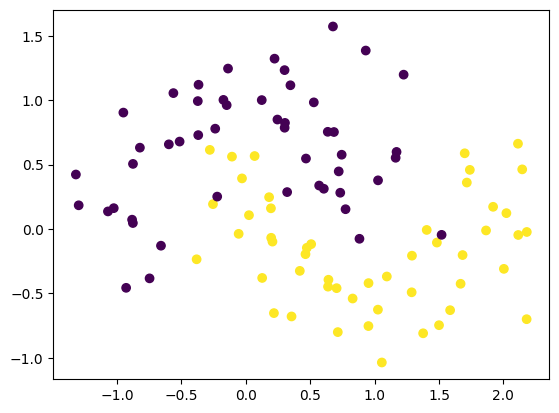

In [8]:
plt.scatter(df['x1'],df['x2'],c=df['y'])

In [9]:
x = df.drop('y',axis=1).values
y = df['y'].values

## SGD

In [10]:
opt = SGD(learning_rate=0.01,momentum=0.0,nesterov=False,name='sgd')

In [11]:
model = Sequential()

model.add(Dense(5,activation='relu',input_dim=2))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [13]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 4s 290ms/step - loss: 0.6837 - accuracy: 0.4937 - val_loss: 0.6402 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6799 - accuracy: 0.4937 - val_loss: 0.6364 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6775 - accuracy: 0.4937 - val_loss: 0.6337 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6755 - accuracy: 0.4937 - val_loss: 0.6309 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6740 - accuracy: 0.4937 - val_loss: 0.6284 - val_accuracy: 0.5500
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6726 - accuracy: 0.4937 - val_loss: 0.6266 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6719 - accuracy: 0.5063 - val_loss: 0.6249 - val_accuracy: 0.5500
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 41ms/step - loss: 0.6431 - accuracy: 0.6582 - val_loss: 0.5793 - val_accuracy: 0.7000
Epoch 60/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6427 - accuracy: 0.6709 - val_loss: 0.5785 - val_accuracy: 0.7000
Epoch 61/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6420 - accuracy: 0.6582 - val_loss: 0.5775 - val_accuracy: 0.7000
Epoch 62/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6414 - accuracy: 0.6709 - val_loss: 0.5764 - val_accuracy: 0.7000
Epoch 63/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6409 - accuracy: 0.6709 - val_loss: 0.5755 - val_accuracy: 0.7000
Epoch 64/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6403 - accuracy: 0.6709 - val_loss: 0.5744 - val_accuracy: 0.7500
Epoch 65/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6396 - accuracy: 0.6962 - val_loss: 0.5737 - val_accuracy: 0.7500
Epoch 66/100
3/3 [========

9600/9600 [==============================] - 22s 2ms/step


Text(0.5, 1.0, 'SGD')

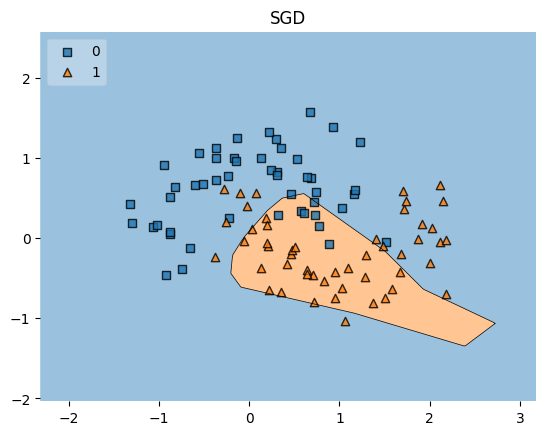

In [73]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.title('SGD')

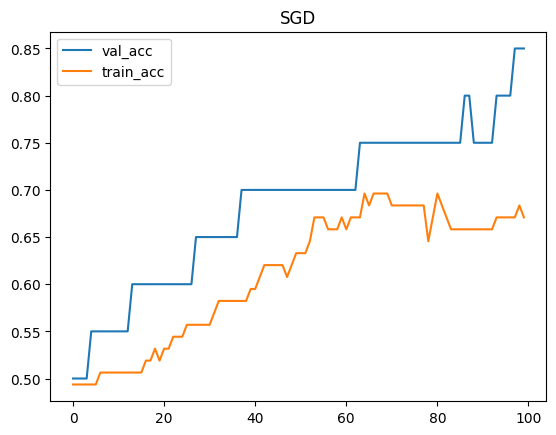

In [74]:
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.plot(history.history['accuracy'],label='train_acc')
plt.legend()
plt.title('SGD')
plt.show()

## SGD With Momentum

In [19]:
model1 = Sequential()

model1.add(Dense(5,activation='relu',input_dim=2))
model1.add(Dense(3,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [20]:
opt = SGD(learning_rate=0.01,momentum=0.9,nesterov=False,name='sgd')

In [21]:
model1.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=opt)

In [23]:
hisotry1 = model1.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 197ms/step - loss: 0.6776 - accuracy: 0.4557 - val_loss: 0.6569 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6760 - accuracy: 0.5063 - val_loss: 0.6537 - val_accuracy: 0.6500
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6728 - accuracy: 0.5190 - val_loss: 0.6493 - val_accuracy: 0.6500
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6691 - accuracy: 0.5570 - val_loss: 0.6437 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 70ms/step - loss: 0.6637 - accuracy: 0.6582 - val_loss: 0.6373 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6578 - accuracy: 0.7215 - val_loss: 0.6300 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6507 - accuracy: 0.7342 - val_loss: 0.6221 - val_accuracy: 0.7000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 31ms/step - loss: 0.3643 - accuracy: 0.8481 - val_loss: 0.2329 - val_accuracy: 0.8000
Epoch 60/100
3/3 [==============================] - 0s 33ms/step - loss: 0.3633 - accuracy: 0.8481 - val_loss: 0.2331 - val_accuracy: 0.8000
Epoch 61/100
3/3 [==============================] - 0s 31ms/step - loss: 0.3623 - accuracy: 0.8481 - val_loss: 0.2332 - val_accuracy: 0.8500
Epoch 62/100
3/3 [==============================] - 0s 31ms/step - loss: 0.3616 - accuracy: 0.8481 - val_loss: 0.2332 - val_accuracy: 0.8500
Epoch 63/100
3/3 [==============================] - 0s 33ms/step - loss: 0.3622 - accuracy: 0.8608 - val_loss: 0.2341 - val_accuracy: 0.9000
Epoch 64/100
3/3 [==============================] - 0s 31ms/step - loss: 0.3613 - accuracy: 0.8608 - val_loss: 0.2355 - val_accuracy: 0.9000
Epoch 65/100
3/3 [==============================] - 0s 31ms/step - loss: 0.3610 - accuracy: 0.8608 - val_loss: 0.2363 - val_accuracy: 0.9000
Epoch 66/100
3/3 [========

9600/9600 [==============================] - 24s 3ms/step


Text(0.5, 1.0, 'SGD With Momentum')

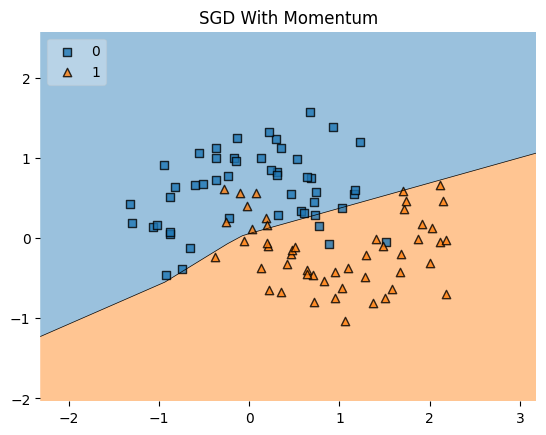

In [72]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.title('SGD With Momentum')

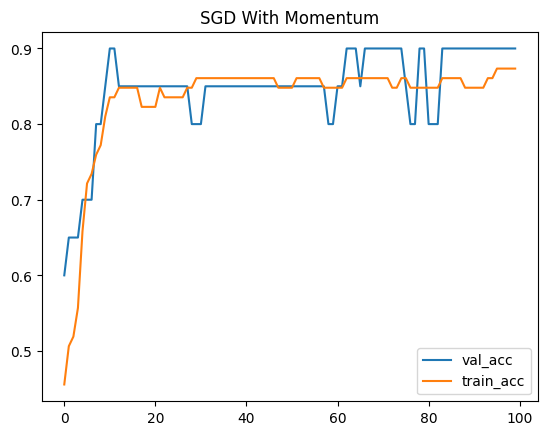

In [71]:
plt.plot(hisotry1.history['val_accuracy'],label='val_acc')
plt.plot(hisotry1.history['accuracy'],label='train_acc')
plt.legend()
plt.title('SGD With Momentum')
plt.show()

## NAG

In [27]:
model2 = Sequential()

model2.add(Dense(5,activation='relu',input_dim=2))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [28]:
opt = SGD(learning_rate=0.01,momentum=0.9,nesterov=True,name='sgd')

In [29]:
model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [30]:
history2 = model2.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 263ms/step - loss: 0.6752 - accuracy: 0.3924 - val_loss: 0.6482 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 38ms/step - loss: 0.6704 - accuracy: 0.4051 - val_loss: 0.6370 - val_accuracy: 0.9000
Epoch 3/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6626 - accuracy: 0.7722 - val_loss: 0.6238 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6541 - accuracy: 0.7722 - val_loss: 0.6084 - val_accuracy: 0.9000
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6435 - accuracy: 0.8101 - val_loss: 0.5929 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6339 - accuracy: 0.8228 - val_loss: 0.5767 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 50ms/step - loss: 0.6224 - accuracy: 0.8101 - val_loss: 0.5604 - val_accuracy: 0.9000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 35ms/step - loss: 0.4091 - accuracy: 0.8608 - val_loss: 0.3028 - val_accuracy: 0.9000
Epoch 60/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4074 - accuracy: 0.8608 - val_loss: 0.3020 - val_accuracy: 0.9000
Epoch 61/100
3/3 [==============================] - 0s 38ms/step - loss: 0.4062 - accuracy: 0.8608 - val_loss: 0.3014 - val_accuracy: 0.9000
Epoch 62/100
3/3 [==============================] - 0s 33ms/step - loss: 0.4049 - accuracy: 0.8481 - val_loss: 0.3007 - val_accuracy: 0.9000
Epoch 63/100
3/3 [==============================] - 0s 37ms/step - loss: 0.4047 - accuracy: 0.8481 - val_loss: 0.3002 - val_accuracy: 0.9000
Epoch 64/100
3/3 [==============================] - 0s 33ms/step - loss: 0.4028 - accuracy: 0.8481 - val_loss: 0.2989 - val_accuracy: 0.9000
Epoch 65/100
3/3 [==============================] - 0s 30ms/step - loss: 0.4018 - accuracy: 0.8481 - val_loss: 0.2977 - val_accuracy: 0.9000
Epoch 66/100
3/3 [========

9600/9600 [==============================] - 24s 2ms/step


Text(0.5, 1.0, 'NAG')

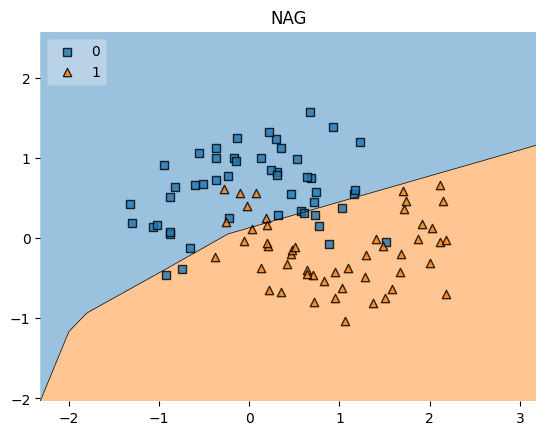

In [70]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.title('NAG')

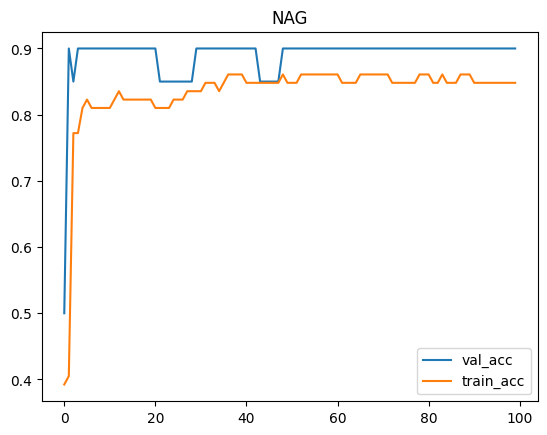

In [69]:
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.plot(history2.history['accuracy'],label='train_acc')
plt.legend()
plt.title('NAG')
plt.show()

## Adagrad

In [35]:
model3 = Sequential()

model3.add(Dense(5,activation='relu',input_dim=2))
model3.add(Dense(3,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 15        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [41]:
model3.compile(loss='binary_crossentropy',optimizer='AdaGrad',metrics=['accuracy'])

In [42]:
history3 = model3.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 191ms/step - loss: 0.5960 - accuracy: 0.7595 - val_loss: 0.5718 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 38ms/step - loss: 0.5956 - accuracy: 0.7595 - val_loss: 0.5715 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 34ms/step - loss: 0.5952 - accuracy: 0.7595 - val_loss: 0.5711 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 0.5949 - accuracy: 0.7595 - val_loss: 0.5709 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5946 - accuracy: 0.7595 - val_loss: 0.5706 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5944 - accuracy: 0.7595 - val_loss: 0.5703 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5941 - accuracy: 0.7595 - val_loss: 0.5701 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 31ms/step - loss: 0.5857 - accuracy: 0.7722 - val_loss: 0.5615 - val_accuracy: 0.8500
Epoch 60/100
3/3 [==============================] - 0s 30ms/step - loss: 0.5856 - accuracy: 0.7722 - val_loss: 0.5614 - val_accuracy: 0.8500
Epoch 61/100
3/3 [==============================] - 0s 32ms/step - loss: 0.5855 - accuracy: 0.7722 - val_loss: 0.5613 - val_accuracy: 0.8500
Epoch 62/100
3/3 [==============================] - 0s 31ms/step - loss: 0.5854 - accuracy: 0.7722 - val_loss: 0.5612 - val_accuracy: 0.8500
Epoch 63/100
3/3 [==============================] - 0s 30ms/step - loss: 0.5852 - accuracy: 0.7722 - val_loss: 0.5611 - val_accuracy: 0.8500
Epoch 64/100
3/3 [==============================] - 0s 41ms/step - loss: 0.5851 - accuracy: 0.7722 - val_loss: 0.5609 - val_accuracy: 0.8500
Epoch 65/100
3/3 [==============================] - 0s 41ms/step - loss: 0.5850 - accuracy: 0.7722 - val_loss: 0.5608 - val_accuracy: 0.8500
Epoch 66/100
3/3 [========

9600/9600 [==============================] - 24s 3ms/step


Text(0.5, 1.0, 'AdaGrad')

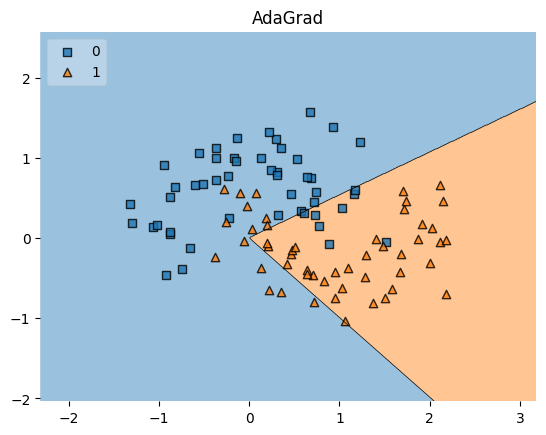

In [68]:
plot_decision_regions(x,y.astype('int'),clf=model3,legend=2)
plt.title('AdaGrad')

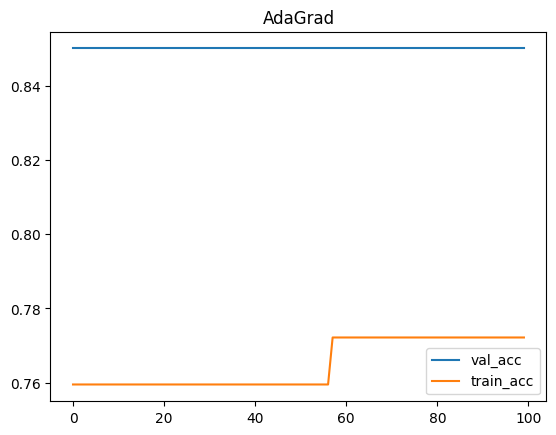

In [67]:
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.plot(history3.history['accuracy'],label='train_acc')
plt.legend()
plt.title('AdaGrad')
plt.show()

## RMSProp

In [47]:
model4 = Sequential()

model4.add(Dense(5,activation='relu',input_dim=2))
model4.add(Dense(3,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 3)                 18        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [48]:
model4.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [49]:
history4 = model4.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 237ms/step - loss: 0.7271 - accuracy: 0.3418 - val_loss: 0.7192 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.7226 - accuracy: 0.3418 - val_loss: 0.7155 - val_accuracy: 0.3000
Epoch 3/100
3/3 [==============================] - 0s 44ms/step - loss: 0.7196 - accuracy: 0.3418 - val_loss: 0.7124 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 52ms/step - loss: 0.7172 - accuracy: 0.3544 - val_loss: 0.7100 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 45ms/step - loss: 0.7152 - accuracy: 0.3544 - val_loss: 0.7077 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 53ms/step - loss: 0.7133 - accuracy: 0.3797 - val_loss: 0.7056 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 48ms/step - loss: 0.7114 - accuracy: 0.3924 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 35ms/step - loss: 0.6421 - accuracy: 0.7848 - val_loss: 0.6243 - val_accuracy: 0.8000
Epoch 60/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6408 - accuracy: 0.7722 - val_loss: 0.6225 - val_accuracy: 0.8000
Epoch 61/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6395 - accuracy: 0.7848 - val_loss: 0.6209 - val_accuracy: 0.8000
Epoch 62/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6384 - accuracy: 0.7848 - val_loss: 0.6190 - val_accuracy: 0.8000
Epoch 63/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6370 - accuracy: 0.7848 - val_loss: 0.6174 - val_accuracy: 0.8000
Epoch 64/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6357 - accuracy: 0.7848 - val_loss: 0.6156 - val_accuracy: 0.8000
Epoch 65/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6345 - accuracy: 0.7848 - val_loss: 0.6138 - val_accuracy: 0.8000
Epoch 66/100
3/3 [========

9600/9600 [==============================] - 23s 2ms/step


Text(0.5, 1.0, 'RMSProp')

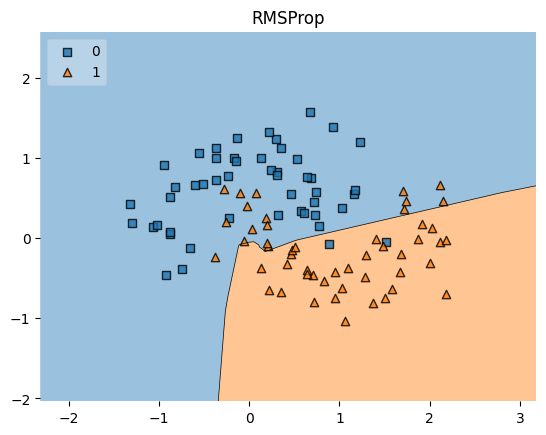

In [65]:
plot_decision_regions(x,y.astype('int'),clf=model4,legend=2)
plt.title('RMSProp')

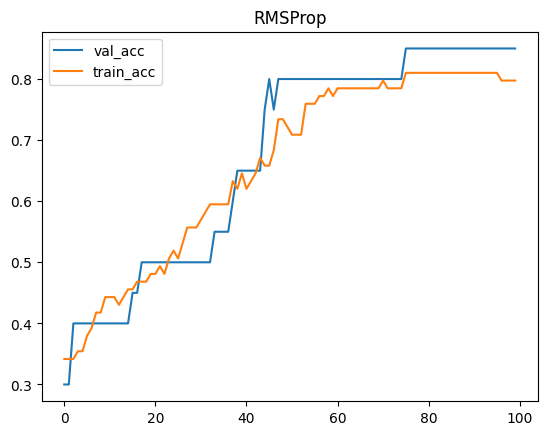

In [64]:
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.plot(history4.history['accuracy'],label='train_acc')
plt.legend()
plt.title('RMSProp')
plt.show()

## Adam

In [53]:
model5 = Sequential()

model5.add(Dense(5,activation='relu',input_dim=2))
model5.add(Dense(3,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 15        
                                                                 
 dense_19 (Dense)            (None, 3)                 18        
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [59]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [60]:
model5.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [61]:
history5 = model5.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 311ms/step - loss: 0.4721 - accuracy: 0.7722 - val_loss: 0.3712 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 39ms/step - loss: 0.4557 - accuracy: 0.7848 - val_loss: 0.3469 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.4401 - accuracy: 0.7848 - val_loss: 0.3253 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.4264 - accuracy: 0.7848 - val_loss: 0.3052 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.4125 - accuracy: 0.7848 - val_loss: 0.2879 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.4015 - accuracy: 0.8101 - val_loss: 0.2752 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.3905 - accuracy: 0.8228 - val_loss: 0.2642 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 31ms/step - loss: 0.2472 - accuracy: 0.8987 - val_loss: 0.1160 - val_accuracy: 0.9500
Epoch 60/100
3/3 [==============================] - 0s 41ms/step - loss: 0.2435 - accuracy: 0.9114 - val_loss: 0.1132 - val_accuracy: 0.9500
Epoch 61/100
3/3 [==============================] - 0s 44ms/step - loss: 0.2388 - accuracy: 0.8987 - val_loss: 0.1119 - val_accuracy: 0.9500
Epoch 62/100
3/3 [==============================] - 0s 51ms/step - loss: 0.2368 - accuracy: 0.8987 - val_loss: 0.1107 - val_accuracy: 0.9500
Epoch 63/100
3/3 [==============================] - 0s 50ms/step - loss: 0.2342 - accuracy: 0.9114 - val_loss: 0.1093 - val_accuracy: 0.9500
Epoch 64/100
3/3 [==============================] - 0s 60ms/step - loss: 0.2315 - accuracy: 0.9114 - val_loss: 0.1064 - val_accuracy: 0.9500
Epoch 65/100
3/3 [==============================] - 0s 37ms/step - loss: 0.2268 - accuracy: 0.9114 - val_loss: 0.1071 - val_accuracy: 0.9500
Epoch 66/100
3/3 [========

9600/9600 [==============================] - 24s 2ms/step


Text(0.5, 1.0, 'Adam')

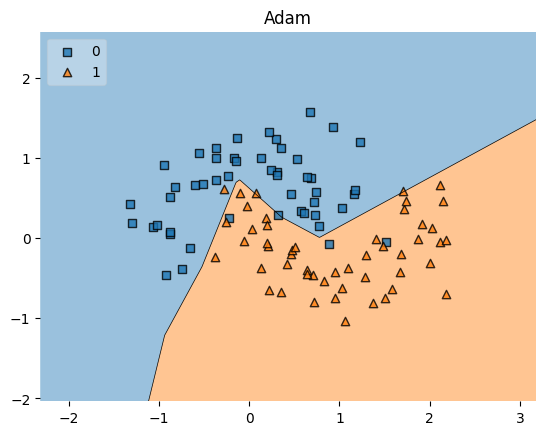

In [66]:
plot_decision_regions(x,y.astype('int'),clf=model5,legend=2)
plt.title('Adam')

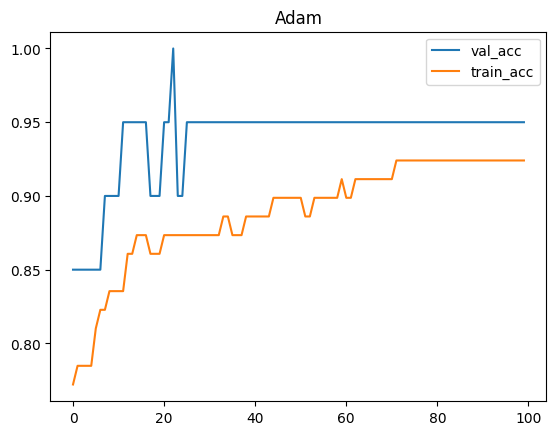

In [63]:
plt.plot(history5.history['val_accuracy'],label='val_acc')
plt.plot(history5.history['accuracy'],label='train_acc')
plt.legend()
plt.title('Adam')
plt.show()